# https://www.kaggle.com/c/kaggle-pog-series-s01e01/overview

### objective: The task of this competition is to predict the 'like to view_count ratio' of youtube videos based on the title, description, thumbnail and additional metadata. You are free to use all data provided, however do not use external data for training your models.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

for directory,_,filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(directory,filename))

data/train.parquet
data/test.parquet


In [2]:
train = pd.read_parquet('data/train.parquet')
test = pd.read_parquet('data/test.parquet')


In [3]:
train.shape

(92275, 20)

In [4]:
test.shape

(5800, 16)

In [5]:
set(train.columns) - set(test.columns)

{'comment_count', 'dislikes', 'likes', 'target', 'view_count'}

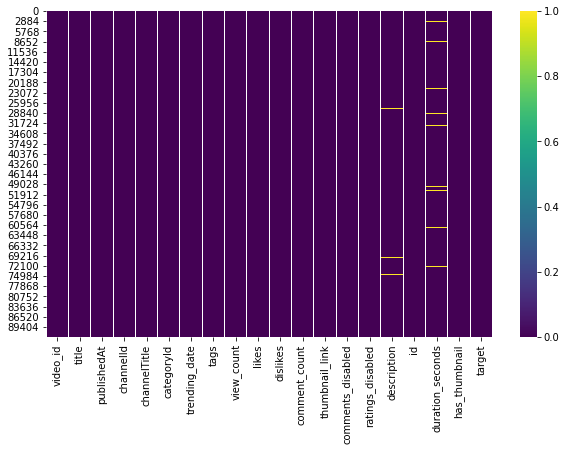

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isna(),cmap='viridis' )
plt.show()

In [7]:
train.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1476
id                      0
duration_seconds     2176
has_thumbnail           0
target                  0
dtype: int64

In [8]:
for i in train.columns:
    if train[i].isna().sum() > 0:
        print(i, train[i].isna().sum(),train[i].isna().sum()/train.shape[0])

description 1476 0.015995665131400705
duration_seconds 2176 0.023581685180167976


In [9]:
train = train.dropna()

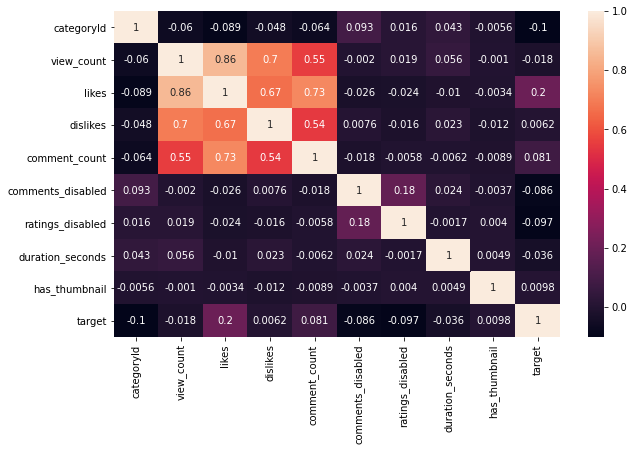

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True)
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


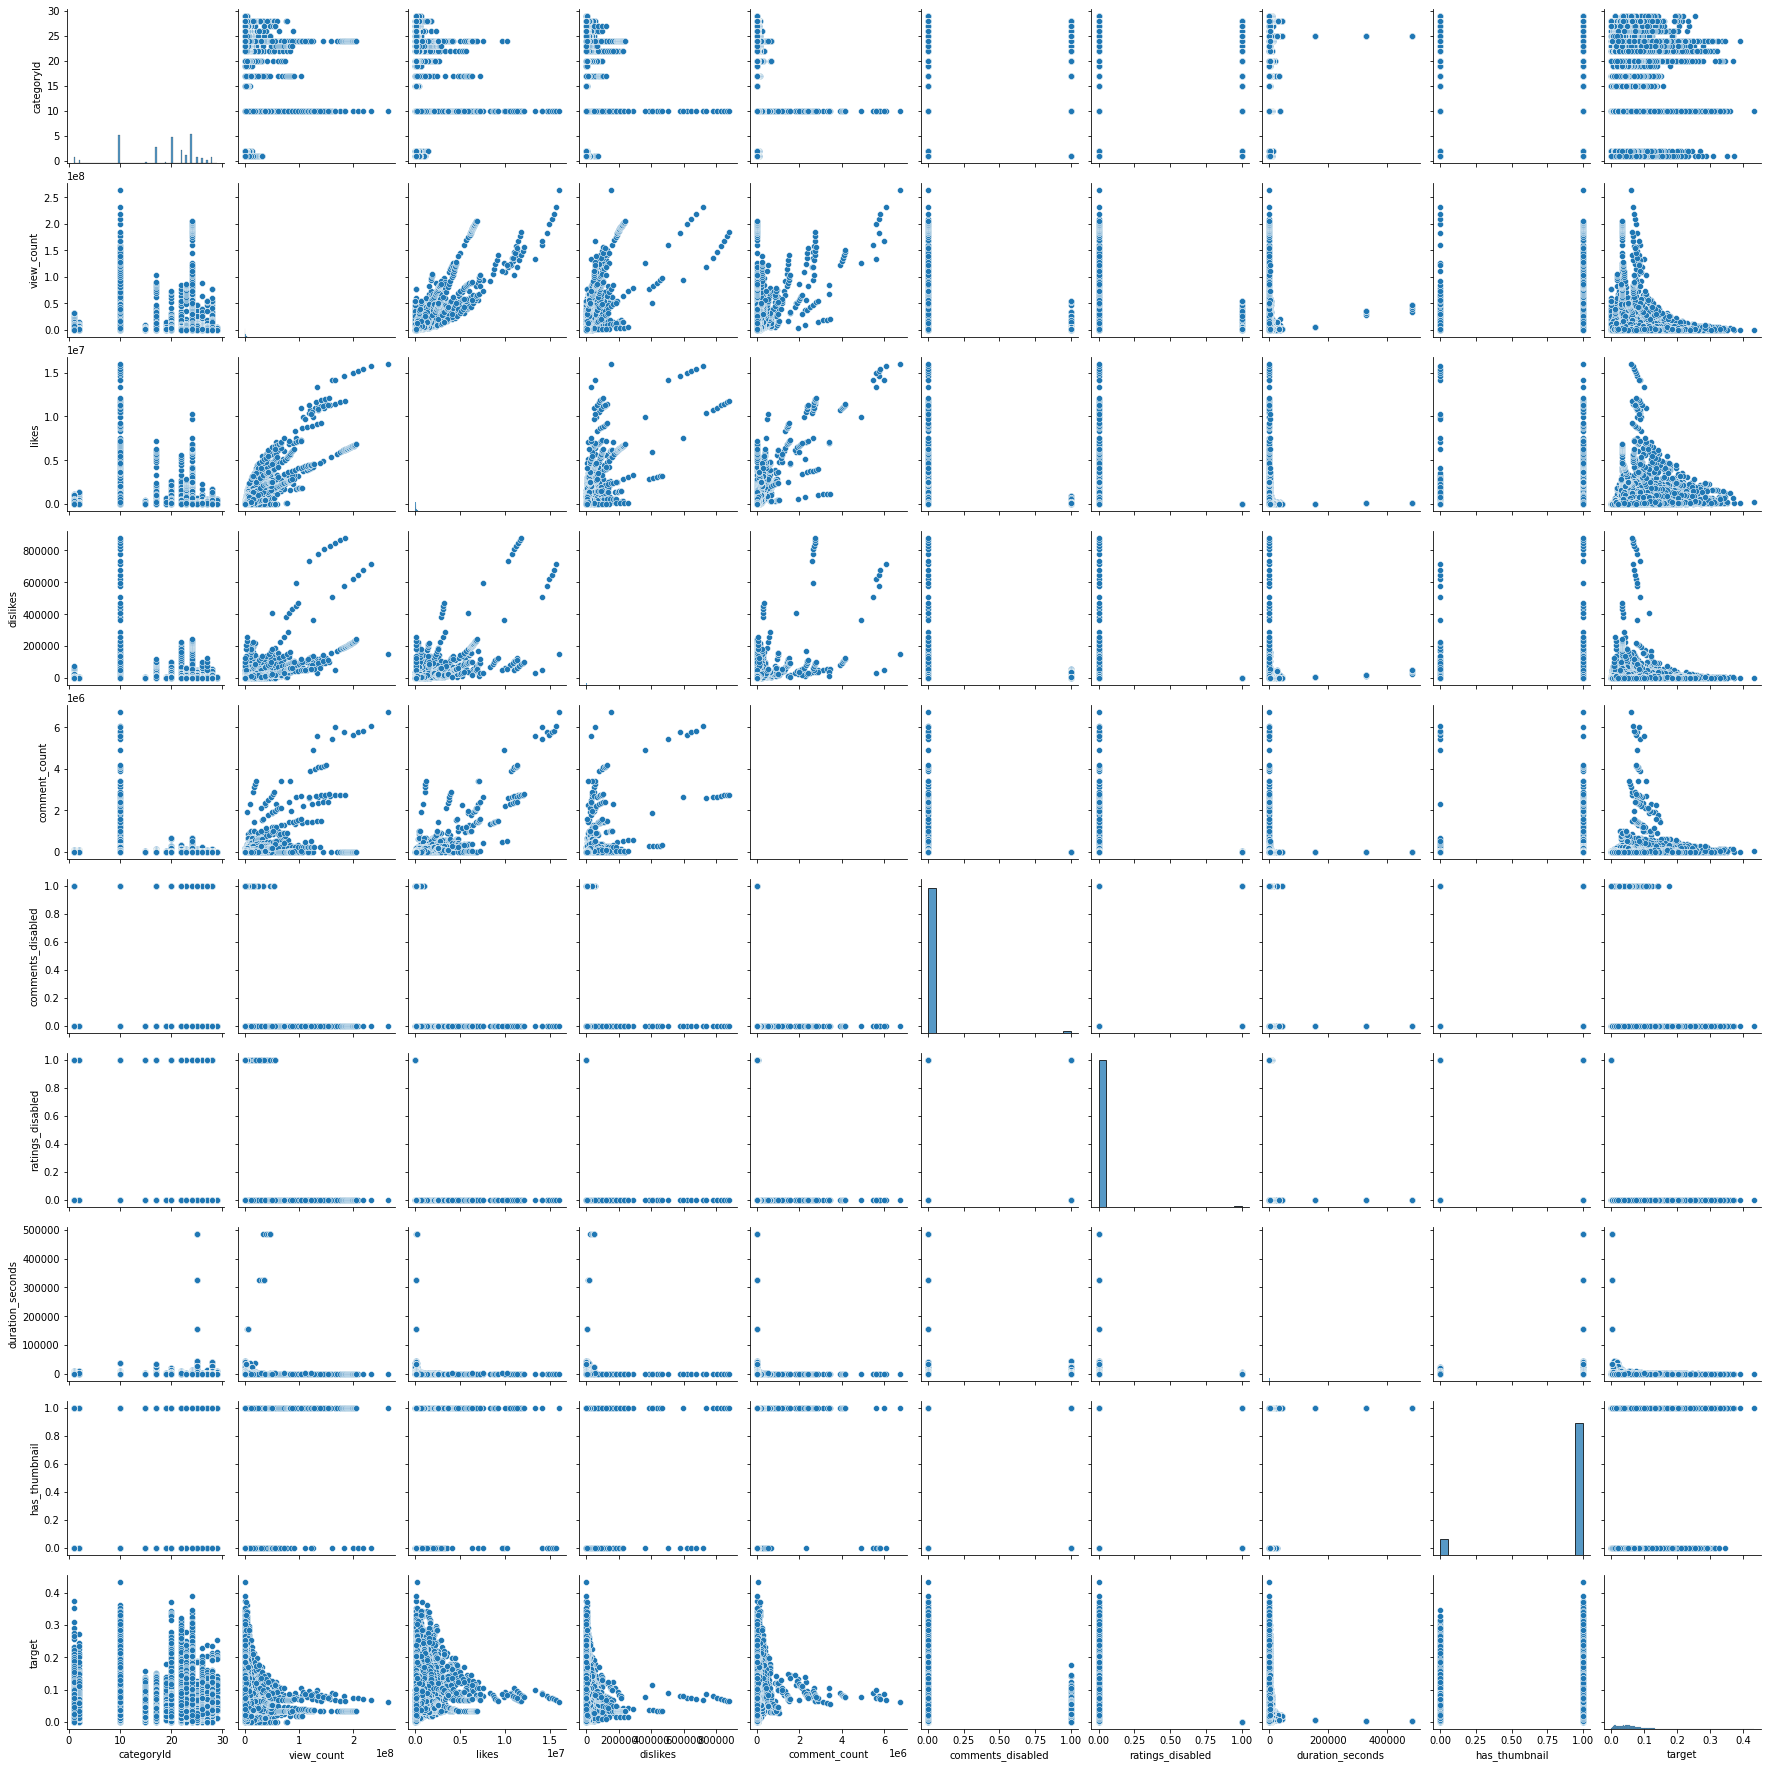

In [11]:
sns.pairplot(train)

In [12]:
train.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,308,1647,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,430836,37754,256,4818,https://i.ytimg.com/vi/OQZ5ht79nEw/default.jpg,False,False,We answered your assumptions about us...Go to ...,OQZ5ht79nEw_2020-08-12,1083.0,True,0.087630


In [13]:
test.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.0,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True


In [14]:
train.corr()['target'].sort_values()

categoryId          -0.101196
ratings_disabled    -0.096604
comments_disabled   -0.085706
duration_seconds    -0.035559
view_count          -0.018430
dislikes             0.006248
has_thumbnail        0.009836
comment_count        0.081240
likes                0.202934
target               1.000000
Name: target, dtype: float64

In [15]:
train.corr()['view_count'].sort_values()

categoryId          -0.060235
target              -0.018430
comments_disabled   -0.002041
has_thumbnail       -0.001006
ratings_disabled     0.018585
duration_seconds     0.056385
comment_count        0.552851
dislikes             0.698304
likes                0.855172
view_count           1.000000
Name: view_count, dtype: float64

In [16]:
train.sort_values(by='view_count',ascending=False)[:10]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
55947,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,WMweEpGlu_U_2021-05-30,183.0,True,0.060594
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,gdZLi9oWNZg_2020-08-28,224.0,False,0.067636
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,gdZLi9oWNZg_2020-08-27,224.0,False,0.070562
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,gdZLi9oWNZg_2020-08-26,224.0,False,0.073096
69658,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,hdmx71UjBXs_2021-08-08,31.0,True,0.033173
69455,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-07,[None],204846218,6791654,237038,2792,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,hdmx71UjBXs_2021-08-07,31.0,True,0.033155
69256,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-06,[None],203532581,6745231,233458,2765,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,hdmx71UjBXs_2021-08-06,31.0,True,0.033141
69053,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-05,[None],202486840,6707446,230736,2744,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,hdmx71UjBXs_2021-08-05,31.0,True,0.033125
68845,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-04,[None],201255646,6667435,227781,2713,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,hdmx71UjBXs_2021-08-04,31.0,True,0.033129
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,gdZLi9oWNZg_2020-08-25,224.0,False,0.074711


In [17]:
train.categoryId.nunique()

15

In [18]:
train.groupby('categoryId')[['view_count']].mean().sort_values(by='view_count',ascending=False)

,view_count
categoryId,
10,4.737164e+06
24,3.216901e+06
28,2.612670e+06
20,2.228907e+06
1,2.194955e+06
22,2.130109e+06
17,2.071624e+06
23,1.740055e+06
29,1.707993e+06


<Figure size 720x360 with 0 Axes>

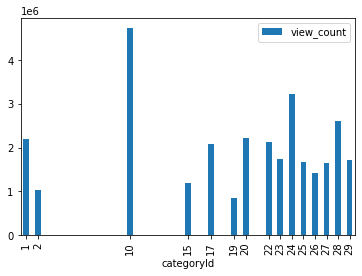

In [19]:
cat_view = train.groupby('categoryId')[['view_count']].mean()
plt.figure(figsize=(10,5))
cat_view.plot.bar()
plt.show()

In [20]:
train[train['categoryId'] == 10]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
45,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13+00:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353329,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,zrsBjYukE8s_2020-08-12,257.0,True,0.102895
46,N5KpIE2tz8M,Tom MacDonald - GRAVESTONES ALBUM,2020-08-10 15:58:26+00:00,UCElGBUWDCa05jRzc2PfmGqQ,Tom MacDonald,10,2020-08-12,Eminem|MGK|Token|NF|Hopsin|Machine Gun Kelly|M...,500658,35858,2238,4872,https://i.ytimg.com/vi/N5KpIE2tz8M/default.jpg,False,False,NEW ALBUM Gravestones AVAILABLE THIS FRIDAY AU...,N5KpIE2tz8M_2020-08-12,162.0,True,0.071622
48,XsmkTqsygD4,42 Dugg - Big 4's (Official Video),2020-08-10 21:02:21+00:00,UChFLDvWugOtrzxmUCAjfnGg,42 dugg Music,10,2020-08-12,[None],494247,15761,344,811,https://i.ytimg.com/vi/XsmkTqsygD4/default.jpg,False,False,From the album Young & Turnt 2 (Deluxe). Out n...,XsmkTqsygD4_2020-08-12,110.0,True,0.031889
49,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296502,6179,30044,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,KX06ksuS6Xo_2020-08-12,176.0,True,0.032437
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07 04:00:10+00:00,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,10,2020-08-12,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,https://i.ytimg.com/vi/hsm4poTWjMs/default.jpg,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...,hsm4poTWjMs_2020-08-12,253.0,True,0.036721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92229,-4FtvGpPNrk,"B-Lovee, G Herbo - My Everything (Part III) (O...",2021-11-24 05:00:00+00:00,UC3nqEB63k7eeqb_d8RhKvoQ,BLoveeVEVO,10,2021-11-30,B-Lovee & G Herbo|My Everything (Part III)|Rap...,779548,29155,276,1193,https://i.ytimg.com/vi/-4FtvGpPNrk/default.jpg,False,False,Official audio for “My Everything (Pt. III)” b...,-4FtvGpPNrk_2021-11-30,152.0,True,0.037400
92243,s1kwS3riCQI,[MV] 화사 (Hwa Sa) - I'm a 빛,2021-11-24 09:00:23+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-11-30,MAMAMOO|마마무|화사|Hwa Sa|Guilty Pleasure|I'm a 빛|...,7676231,745549,5295,35767,https://i.ytimg.com/vi/s1kwS3riCQI/default.jpg,False,False,[MV] 화사 (Hwa Sa) - I'm a 빛\r\rInstagram: https...,s1kwS3riCQI_2021-11-30,261.0,True,0.097124
92249,mxQqqzKnX7I,Chlöe - Have Mercy (AMA Live Performance),2021-11-23 22:00:27+00:00,UCOriumHxzl4O2G7MXS7rrpQ,Chlöe,10,2021-11-30,Chlöe|Chloe Bailey|Have Mercy|Lawd Have Mercy|...,1081748,67625,876,2262,https://i.ytimg.com/vi/mxQqqzKnX7I/default.jpg,False,False,Official live performance of “Have Mercy” by C...,mxQqqzKnX7I_2021-11-30,202.0,True,0.062515
92256,ffcitRgiNDs,Adele - Easy On Me (Live at the NRJ Awards 2021),2021-11-23 15:00:17+00:00,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10,2021-11-30,There ain’t no gold|In this river|That I’ve be...,15866604,597418,5606,16017,https://i.ytimg.com/vi/ffcitRgiNDs/default.jpg,False,False,"Easy On Me by Adele, Live at the NRJ Awards 20...",ffcitRgiNDs_2021-11-30,228.0,True,0.037653


In [21]:
train[train['categoryId'] == 24]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
52,9wDhKJsF5Zk,Cardi B Defends Kylie Jenner In 'WAP' Music Vi...,2020-08-10 17:59:46+00:00,UCGbQJy-531_5vfphay-rChQ,PeopleTV,24,2020-08-12,cardi b|carole baskin|kris jenner|kylie jenner...,131641,938,285,429,https://i.ytimg.com/vi/9wDhKJsF5Zk/default.jpg,False,False,Cardi B explained that husband Offset is frien...,9wDhKJsF5Zk_2020-08-12,140.0,True,0.007125
60,JNJN5HMkRao,Saved by the Bell | Official Teaser 2 | Peacock,2020-08-10 18:19:51+00:00,UCPgMAS8woHJ_o_OZdTR7kcQ,Peacock,24,2020-08-12,peacock|peacock tv|peacock originals|peacock s...,449198,1341,349,315,https://i.ytimg.com/vi/JNJN5HMkRao/default.jpg,False,False,Saved by the Bell is back - to the MAX! Check ...,JNJN5HMkRao_2020-08-12,81.0,True,0.002985
63,ar6UiTbuoSU,"THE OFFICIAL REVEAL OF MY NEW $10,000,000 HOUS...",2020-08-08 18:00:14+00:00,UCilwZiBBfI9X6yiZRzWty8Q,FaZe Rug,24,2020-08-12,faze rug|rug|rugfaze|fazerug|new house|new hou...,6439206,629024,12504,70850,https://i.ytimg.com/vi/ar6UiTbuoSU/default.jpg,False,False,IT'S FINALLY HERE OMG!!!!!!This is the officia...,ar6UiTbuoSU_2020-08-12,1487.0,True,0.097687
67,FQnJRVn3QVk,Watching Movie Trailers... Then Guessing Their...,2020-08-10 16:00:04+00:00,UCF_votze88WRDSEREe9s3aQ,Dylan Is In Trouble,24,2020-08-12,movie|trailer|reaction|review|chill|zone|dylan...,421747,43493,230,3146,https://i.ytimg.com/vi/FQnJRVn3QVk/default.jpg,False,False,"Welcome to the Chill Zone, where we chill and ...",FQnJRVn3QVk_2020-08-12,1056.0,True,0.103126
70,8QsH_xPQFqM,ALREADY | Black Is King | Aliya Janell | Kany ...,2020-08-10 19:00:10+00:00,UC7Ul2k3EhfIHE2RFvjoMorA,Aliya Janell,24,2020-08-12,Aliya Janell|Aliya Janell choreography|queens ...,240028,26192,243,980,https://i.ytimg.com/vi/8QsH_xPQFqM/default.jpg,False,False,Had the pleasure of learning from this queen n...,8QsH_xPQFqM_2020-08-12,118.0,True,0.109121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92248,NkEU6fC_nhY,The Prologue - Jurassic World Dominion,2021-11-23 15:59:20+00:00,UCuTNKMG8HCxb2kYbLXjXTTg,Jurassic World,24,2021-11-30,jurassic world|jurassic world 2|jurassic world...,2779878,91963,1954,7082,https://i.ytimg.com/vi/NkEU6fC_nhY/default.jpg,False,False,This original 5 min prologue to Jurassic World...,NkEU6fC_nhY_2021-11-30,330.0,True,0.033082
92260,OOdDuV-n7V4,STOCK BOX Doll Customizing: Busted up mermaid ...,2021-11-23 15:00:10+00:00,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,24,2021-11-30,stock box|dollightful|doll|mermaid|customizing...,775190,78405,427,9880,https://i.ytimg.com/vi/OOdDuV-n7V4/default.jpg,False,False,I forgot to name this doll during the episode....,OOdDuV-n7V4_2021-11-30,1324.0,True,0.101143
92262,NQSgC2jKIoI,We Took 100 Shots vs a 50 Rated Keeper and Sco...,2021-11-23 22:41:12+00:00,UCQ-YJstgVdAiCT52TiBWDbg,ChrisMD,24,2021-11-30,football|fifa|soccer|fifa 22|chrismd|theo bake...,2611833,91386,906,1604,https://i.ytimg.com/vi/NQSgC2jKIoI/default.jpg,False,False,► Get your own Displates: https://displate.com...,NQSgC2jKIoI_2021-11-30,1064.0,True,0.034989
92268,EbXvnAmdmm8,STUCK WITH MY SISTERS IN MY NYC APARTMENT FOR ...,2021-11-24 14:00:04+00:00,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,2021-11-30,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,615401,42801,215,3022,https://i.ytimg.com/vi/EbXvnAmdmm8/default.jpg,False,False,Booking travel is cheaper on Hopper. Download ...,EbXvnAmdmm8_2021-11-30,1251.0,True,0.069550


In [22]:
train.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,308,1647,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,430836,37754,256,4818,https://i.ytimg.com/vi/OQZ5ht79nEw/default.jpg,False,False,We answered your assumptions about us...Go to ...,OQZ5ht79nEw_2020-08-12,1083.0,True,0.087630


In [23]:
train.groupby('channelTitle')['view_count','likes'].mean()

<ipython-input-23-a6ed9e33dbae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('channelTitle')['view_count','likes'].mean()


,view_count,likes
channelTitle,,
#TeamTrees,6.072632e+05,42834.000000
$uicideboy$,4.081307e+05,36970.333333
(G)I-DLE (여자)아이들 (Official YouTube Channel),1.810049e+07,540422.928571
10 News First,1.620733e+06,15768.000000
10 Tampa Bay,3.476222e+05,821.888889
...,...,...
선미 SUNMI,1.686617e+07,465131.545455
스브스케이팝 / SBS KPOP,2.855081e+06,238574.135135
아는형님 Knowingbros,8.105892e+06,475797.200000


<AxesSubplot:xlabel='likes', ylabel='view_count'>

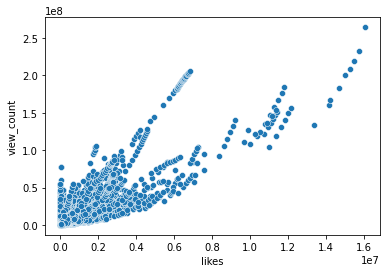

In [24]:
sns.scatterplot(data=train,x='likes',y='view_count')

<AxesSubplot:xlabel='dislikes', ylabel='view_count'>

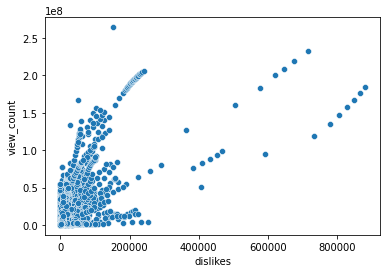

In [25]:
sns.scatterplot(data=train,x='dislikes',y='view_count')

In [26]:
train1 = train[['likes','view_count','target']].copy()
train1.head(2)

,likes,view_count,target
40,7155,540613,0.013235
41,37754,430836,0.087630


In [27]:
train1['pre_target'] = train['likes'] / train1['view_count']
train1.sample(2)

,likes,view_count,target,pre_target
23008,24316,450061,0.054028,0.054028
38040,37124,2522192,0.014719,0.014719


In [28]:
test.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.0,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88685 entries, 40 to 92274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           88685 non-null  object             
 1   title              88685 non-null  object             
 2   publishedAt        88685 non-null  datetime64[ns, UTC]
 3   channelId          88685 non-null  object             
 4   channelTitle       88685 non-null  object             
 5   categoryId         88685 non-null  int64              
 6   trending_date      88685 non-null  object             
 7   tags               88685 non-null  object             
 8   view_count         88685 non-null  int64              
 9   likes              88685 non-null  int64              
 10  dislikes           88685 non-null  int64              
 11  comment_count      88685 non-null  int64              
 12  thumbnail_link     88685 non-null  object    

In [30]:
train['publishedYear'] = train['publishedAt'].dt.year
train['publishedMonth'] = train['publishedAt'].dt.month
train['publishedDay'] = train['publishedAt'].dt.day

In [31]:
max(train['publishedYear']) - min(train['publishedYear'])

1

## test dataframe do not have likes or view_count columns therefore we would have to predict those features

### lets investigate Likes First

In [32]:
likes = train.copy()

In [33]:
likes['likes'].describe()

count    8.868500e+04
mean     1.520009e+05
std      4.410805e+05
min      0.000000e+00
25%      2.158800e+04
50%      5.179600e+04
75%      1.309450e+05
max      1.602153e+07
Name: likes, dtype: float64

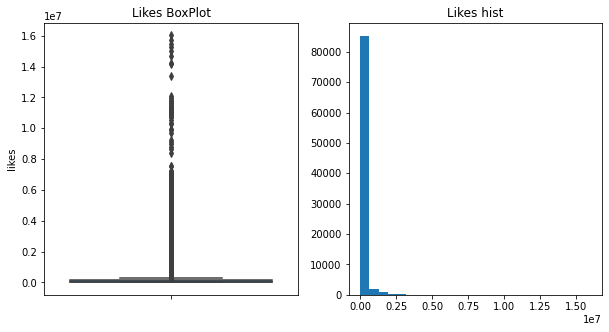

In [34]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(y=likes['likes'],ax=ax1)
ax1.set_title('Likes BoxPlot')
ax2.hist(likes['likes'],bins=25)
ax2.set_title('Likes hist')

plt.show()

In [35]:
likes.sample(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,publishedYear,publishedMonth,publishedDay
30876,6K78JJbOhpY,National Guard stationed at U.S. Capitol amid ...,2021-01-13 18:30:59+00:00,UCsZYUb8C_19bWOCKF9jRwSg,The Globe and Mail,25,2021-01-17,news canada|u.s. capitol|national guard|joe bi...,262697,2692,...,True,False,The National Guard is stationed in the U.S. Ca...,6K78JJbOhpY_2021-01-17,88.0,True,0.010248,2021,1,13


In [36]:
likes.shape

(88685, 23)

In [37]:
IQR = likes['likes'].quantile(.75) - likes['likes'].quantile(.25) * 1.5

min_likes = likes['likes'].quantile(.25) - IQR
max_likes = likes['likes'].quantile(.75) + IQR

In [38]:
df_likes = likes[(likes['likes'] > min_likes) & (likes['likes'] < max_likes) ]

In [39]:
print('{} observations were removed aftering handinging outliers'.format(likes.shape[0]-df_likes.shape[0]))
print('{} observations were removed aftering handinging outliers'.
      format((likes.shape[0]-df_likes.shape[0])/likes.shape[0]*100))
print('dataset old/new: {}/{}'.format(likes.shape[0],df_likes.shape[0]))






12474 observations were removed aftering handinging outliers
14.065512769915994 observations were removed aftering handinging outliers
dataset old/new: 88685/76211


In [40]:
df_likes['likes'].describe()

count     76211.000000
mean      59603.136385
std       54123.849262
min           0.000000
25%       18399.000000
50%       41395.000000
75%       84877.500000
max      229435.000000
Name: likes, dtype: float64

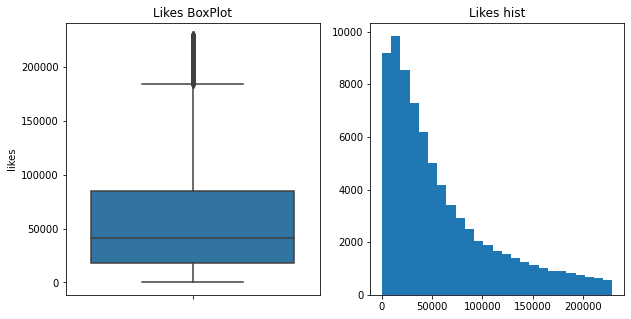

In [41]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(y=df_likes['likes'],ax=ax1)
ax1.set_title('Likes BoxPlot')
ax2.hist(df_likes['likes'],bins=25)
ax2.set_title('Likes hist')

plt.show()

In [45]:
#df_likes[df_likes['likes']>df_likes['likes'].quantile(.75)]

### lets check out the likes to amount of tages

In [47]:
df_likes['tags_amt'] = df_likes['tags'].apply(lambda x: len(x.split('|')))

<ipython-input-47-e60681ec8deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_likes['tags_amt'] = df_likes['tags'].apply(lambda x: len(x.split('|')))


In [48]:
df_likes.sample()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,publishedYear,publishedMonth,publishedDay,tags_amt
36762,2SYSf2OlGRs,Busta Rhymes on Losing 100 Pounds & Getting Fi...,2021-02-09 18:00:00+00:00,UCwJfDTNqtM5n-dQBfuuHzYw,Men's Health,26,2021-02-15,busta rhymes|busta rhymes workout|busta rhymes...,679422,4002,...,False,Legendary rapper Busta Rhymes lost 100 pounds ...,2SYSf2OlGRs_2021-02-15,201.0,True,0.00589,2021,2,9,25


In [49]:
df_likes['tags_amt'].describe()

count    76211.000000
mean        17.328666
std         12.163203
min          1.000000
25%          7.000000
50%         17.000000
75%         26.000000
max         74.000000
Name: tags_amt, dtype: float64

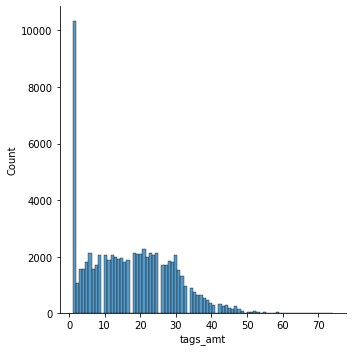

In [50]:
sns.displot(df_likes['tags_amt'])

In [51]:
df_likes[df_likes['tags_amt'] == 1]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,publishedYear,publishedMonth,publishedDay,tags_amt
48,XsmkTqsygD4,42 Dugg - Big 4's (Official Video),2020-08-10 21:02:21+00:00,UChFLDvWugOtrzxmUCAjfnGg,42 dugg Music,10,2020-08-12,[None],494247,15761,...,False,From the album Young & Turnt 2 (Deluxe). Out n...,XsmkTqsygD4_2020-08-12,110.0,True,0.031889,2020,8,10,1
55,RQqJeIyyQBs,"Kali Uchis, Rico Nasty – Aquí Yo Mando [Offici...",2020-08-10 14:00:10+00:00,UCQTuAezPu6MOpcIJ1Tz9dNA,KALI UCHIS,10,2020-08-12,[None],420665,36945,...,False,"Kali Uchis & Rico Nasty, Aquí Yo Mando out now...",RQqJeIyyQBs_2020-08-12,176.0,True,0.087825,2020,8,10,1
73,1hx4vCChBlI,robot boyfriend,2020-08-11 01:37:40+00:00,UCf1JAjcoBlCRi4pHG2k_W7w,Lilypi2,24,2020-08-12,[None],232400,37375,...,False,yep,1hx4vCChBlI_2020-08-12,31.0,True,0.160822,2020,8,11,1
76,goOmZUwQYlA,100k,2020-08-11 03:06:21+00:00,UCf1JAjcoBlCRi4pHG2k_W7w,Lilypi2,24,2020-08-12,[None],277407,28692,...,False,thanks,goOmZUwQYlA_2020-08-12,20.0,False,0.103429,2020,8,11,1
77,KnE6u4hFx14,PAINTING OUR FACES ON BRENT'S NEW HOUSE! (REVE...,2020-08-08 20:45:05+00:00,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,26,2020-08-12,[None],4030996,190480,...,False,Wait untill you guys see his reaction. Thank y...,KnE6u4hFx14_2020-08-12,493.0,True,0.047254,2020,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92251,rrMhIQGhDNw,Whenever theres ACTUALLY a good dad in ANY sho...,2021-11-24 00:52:34+00:00,UCI1XS_GkLGDOgf8YLaaXNRA,CalebCity,23,2021-11-30,[None],1367884,184855,...,False,I call it every time.Music19 - OddwinMelodic -...,rrMhIQGhDNw_2021-11-30,156.0,True,0.135139,2021,11,24,1
92255,TPAoof3GSyE,Glee did NOT age well,2021-11-23 17:00:17+00:00,UCuo9VyowIT-ljA5G2ZuC6Yw,Eddy Burback,23,2021-11-30,[None],1006523,107018,...,False,Use code EDDY14 for up to 14 FREE MEALS + 3 Fr...,TPAoof3GSyE_2021-11-30,1272.0,True,0.106324,2021,11,23,1
92259,PpF8AaPyqhQ,Java Account Move: A Fun Visit from Dinnerbone,2021-11-24 15:58:10+00:00,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,20,2021-11-30,[None],638166,53284,...,False,"Knock, knock. Who’s there? It’s Dinnerbone, wi...",PpF8AaPyqhQ_2021-11-30,136.0,True,0.083496,2021,11,24,1
92263,YZulBGsCWio,My CRUSH Gives Me The ULTIMATE MAKEOVER!!,2021-11-23 12:39:09+00:00,UCpLcXDC0x516xkamfP3-JHg,Andrew Davila,22,2021-11-30,[None],1730942,107133,...,False,This makeover was crazy! Thank you James and L...,YZulBGsCWio_2021-11-30,750.0,True,0.061893,2021,11,23,1


<AxesSubplot:xlabel='tags_amt', ylabel='likes'>

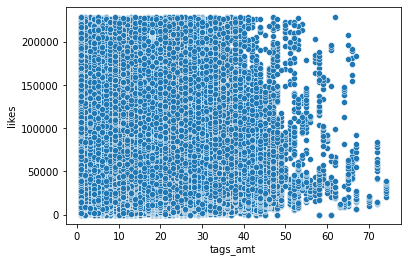

In [52]:
sns.scatterplot(data=df_likes,x='tags_amt',y='likes')

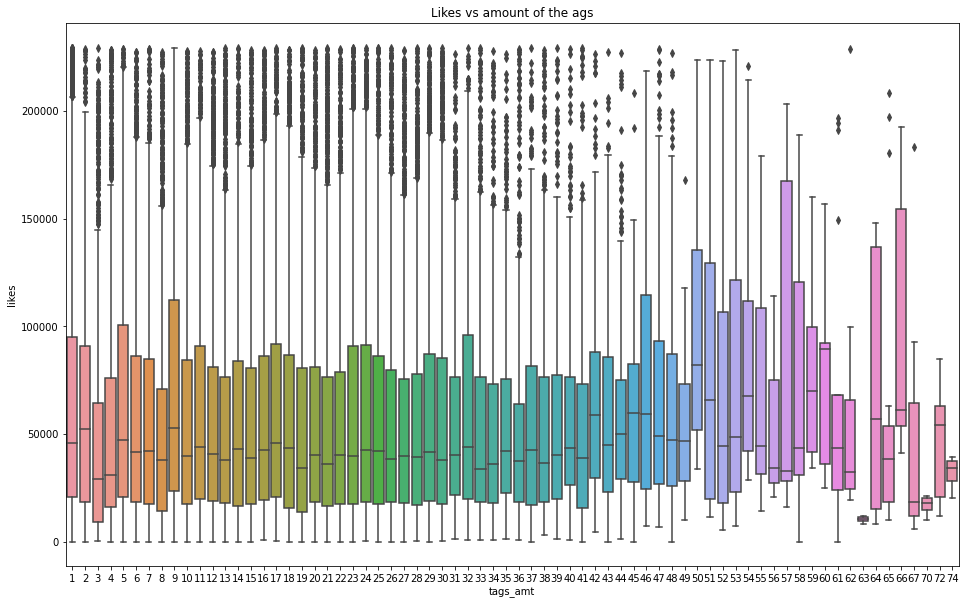

In [53]:
plt.figure(figsize=(16,10))
sns.boxplot(y='likes',x='tags_amt',data=df_likes)
plt.title('Likes vs amount of the ags')
plt.show()

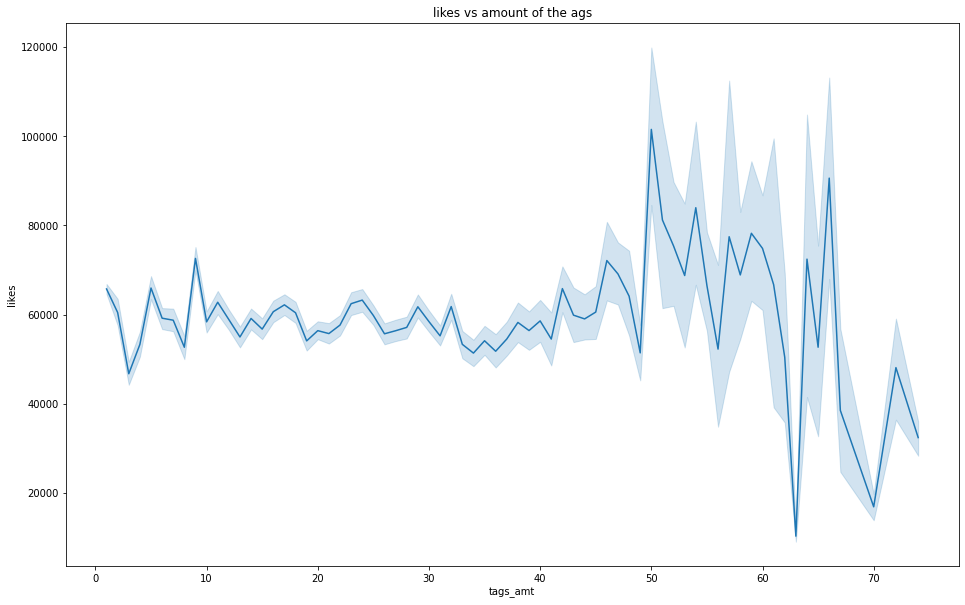

In [54]:
plt.figure(figsize=(16,10))
sns.lineplot(y='likes',x='tags_amt',data=df_likes)
plt.title('likes vs amount of the ags')
plt.show()

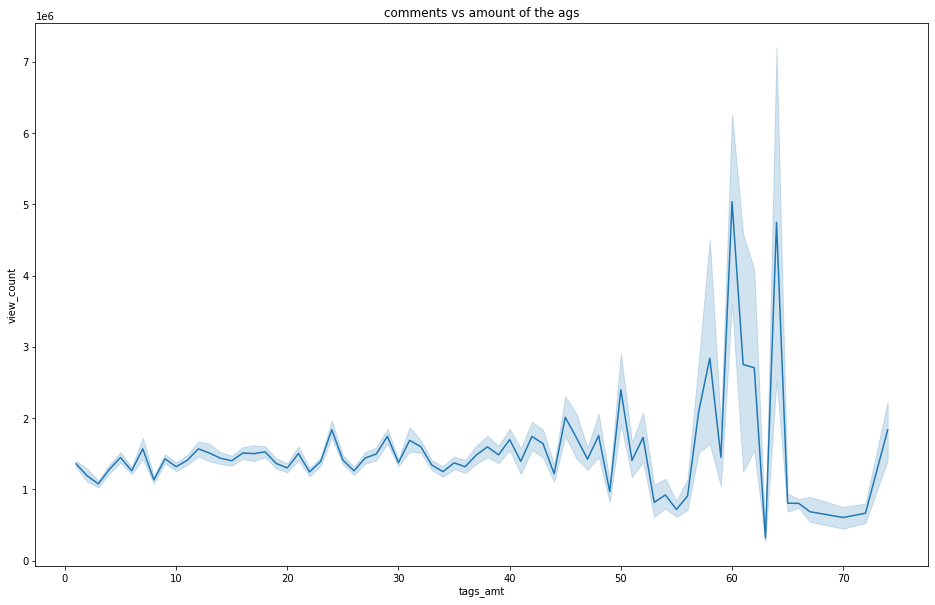

In [55]:
plt.figure(figsize=(16,10))
sns.lineplot(y='view_count',x='tags_amt',data=df_likes)
plt.title('comments vs amount of the ags')
plt.show()

In [56]:
df_likes[df_likes['tags_amt'] == 63]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,publishedYear,publishedMonth,publishedDay,tags_amt
88114,qtS1VKIJdY8,The History Of The Sharingan (Naruto),2021-11-08 00:37:38+00:00,UCkbrlVKUj1hjQ9Bat0CvJLQ,The Amagi,1,2021-11-09,Sharingan|Uchiha clan|Byakugan|Rinnegan|Kaguya...,228881,8178,...,False,The History Of The Sharingan (Naruto)Check Out...,qtS1VKIJdY8_2021-11-09,1135.0,True,0.035730,2021,11,8,63
88366,qtS1VKIJdY8,The History Of The Sharingan (Naruto),2021-11-08 00:37:38+00:00,UCkbrlVKUj1hjQ9Bat0CvJLQ,The Amagi,1,2021-11-10,Sharingan|Uchiha clan|Byakugan|Rinnegan|Kaguya...,281937,9527,...,False,The History Of The Sharingan (Naruto)Check Out...,qtS1VKIJdY8_2021-11-10,1135.0,True,0.033791,2021,11,8,63
88607,qtS1VKIJdY8,The History Of The Sharingan (Naruto),2021-11-08 00:37:38+00:00,UCkbrlVKUj1hjQ9Bat0CvJLQ,The Amagi,1,2021-11-11,Sharingan|Uchiha clan|Byakugan|Rinnegan|Kaguya...,325378,10569,...,False,The History Of The Sharingan (Naruto)Check Out...,qtS1VKIJdY8_2021-11-11,1135.0,True,0.032482,2021,11,8,63
88852,qtS1VKIJdY8,The History Of The Sharingan (Naruto),2021-11-08 00:37:38+00:00,UCkbrlVKUj1hjQ9Bat0CvJLQ,The Amagi,1,2021-11-12,Sharingan|Uchiha clan|Byakugan|Rinnegan|Kaguya...,362508,11410,...,False,The History Of The Sharingan (Naruto)Check Out...,qtS1VKIJdY8_2021-11-12,1135.0,True,0.031475,2021,11,8,63
89072,qtS1VKIJdY8,The History Of The Sharingan (Naruto),2021-11-08 00:37:38+00:00,UCkbrlVKUj1hjQ9Bat0CvJLQ,The Amagi,1,2021-11-13,Sharingan|Uchiha clan|Byakugan|Rinnegan|Kaguya...,387752,12007,...,False,The History Of The Sharingan (Naruto)Check Out...,qtS1VKIJdY8_2021-11-13,1135.0,True,0.030966,2021,11,8,63


In [57]:
df_likes.corr()[['likes','tags_amt','view_count']]

,likes,tags_amt,view_count
categoryId,-0.040575,-0.046916,-0.009670
view_count,0.459195,0.034164,1.000000
likes,1.000000,-0.022915,0.459195
dislikes,0.245355,0.005508,0.339613
comment_count,0.553036,0.024226,0.327443
comments_disabled,-0.054005,-0.006057,0.041671
ratings_disabled,-0.081090,-0.032127,0.127313
duration_seconds,0.011975,0.008159,0.272972
has_thumbnail,0.006153,0.011098,0.002563
target,0.385739,-0.078134,-0.216379


In [58]:
df_likes.channelId.nunique()

4230

In [59]:
df_likes.groupby('channelTitle').agg({'likes':'sum',
'tags_amt':'mean'}).sort_values(by='likes',ascending=False)[:10]

,likes,tags_amt
channelTitle,,
SSSniperWolf,71064176,11.561404
The Game Theorists,31737943,24.132653
Apex Legends,23294783,23.708571
The Film Theorists,23258490,25.454545
Marques Brownlee,22793693,12.618705
CalebCity,22500304,1.159091
The Food Theorists,21789796,27.944724
Veritasium,21434179,11.258427
Drew Gooden,20740717,15.657534


In [60]:
df_likes['has_thumbnail'].value_counts()

True     68159
False     8052
Name: has_thumbnail, dtype: int64

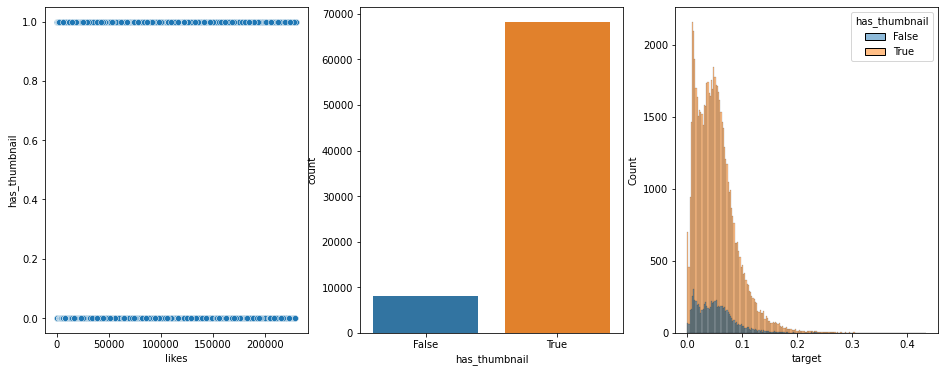

In [61]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
sns.scatterplot(data=df_likes,y='has_thumbnail',x='likes',ax=ax1)
sns.countplot(data=df_likes,x='has_thumbnail',ax=ax2)
sns.histplot(data=df_likes,x='target',hue='has_thumbnail',ax=ax3)
plt.show()

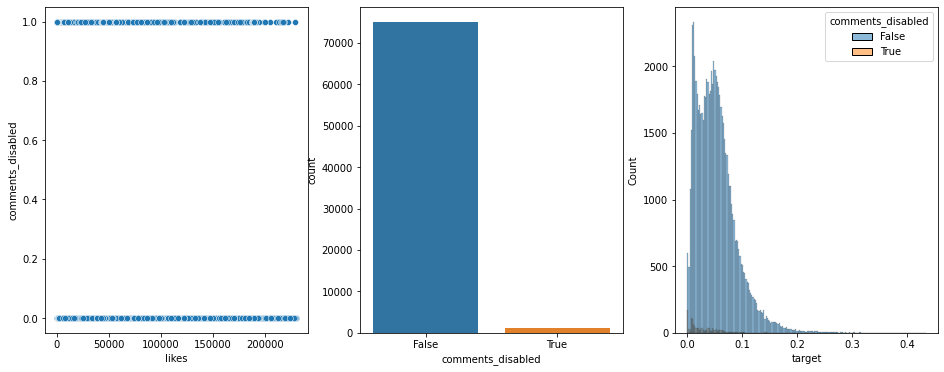

In [62]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
y = 'comments_disabled'
sns.scatterplot(data=df_likes,y=y,x='likes',ax=ax1)
sns.countplot(data=df_likes,x=y,ax=ax2)
sns.histplot(data=df_likes,x='target',hue=y,ax=ax3)
plt.show()

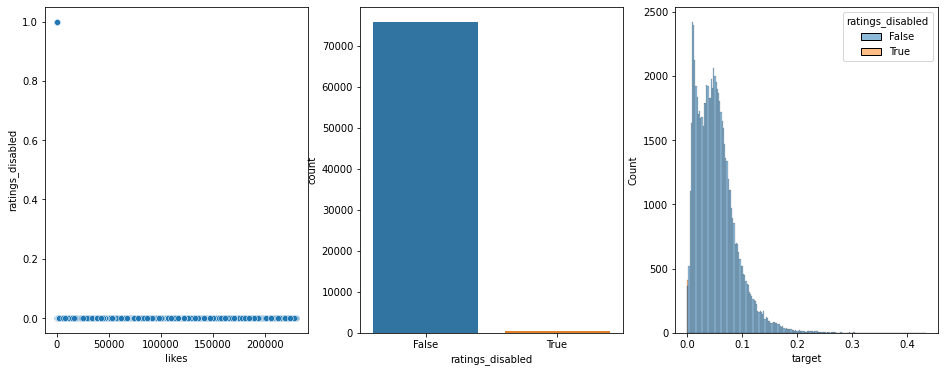

In [63]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
y = 'ratings_disabled'
sns.scatterplot(data=df_likes,y=y,x='likes',ax=ax1)
sns.countplot(data=df_likes,x=y,ax=ax2)
sns.histplot(data=df_likes,x='target',hue=y,ax=ax3)
plt.show()

<AxesSubplot:>

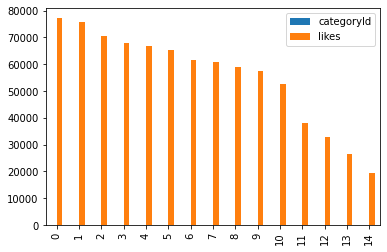

In [64]:
df_likes.groupby('categoryId')['likes'].mean().sort_values(ascending=False).reset_index().plot.bar()

<AxesSubplot:xlabel='publishedDay', ylabel='likes'>

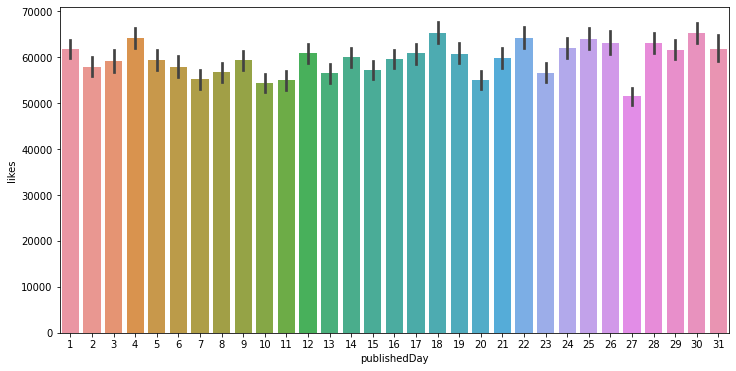

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_likes,x='publishedDay',y='likes')

<AxesSubplot:xlabel='publishedMonth', ylabel='likes'>

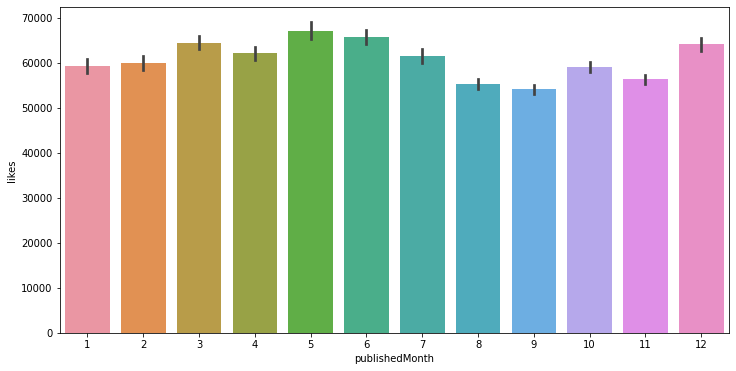

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_likes,x='publishedMonth',y='likes')

<AxesSubplot:xlabel='publishedYear', ylabel='likes'>

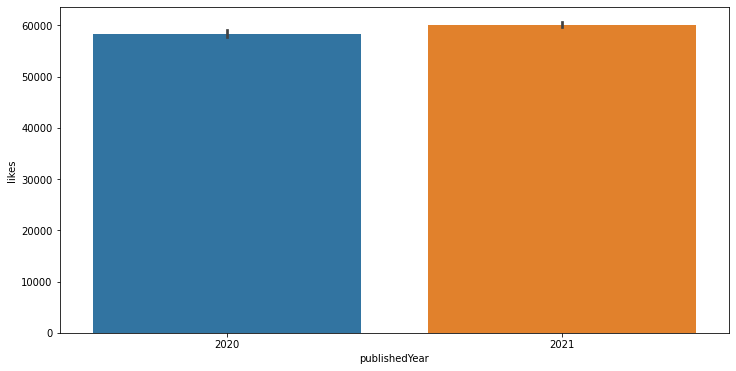

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_likes,x='publishedYear',y='likes')

In [68]:
df_likes.sample()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,publishedYear,publishedMonth,publishedDay,tags_amt
39909,msdoXTBCjtc,Laurie Hernandez – Floor Exercise – 2021 Winte...,2021-02-27 18:33:11+00:00,UCNCY2HGNRiXPqWejJDaWY8w,USA Gymnastics,17,2021-03-05,USA|Gymnastics|Sports|National Team|Routine|Tr...,343118,3155,...,False,"Score: 12.050 (4.2, 7.850)Feb, 27, 2021 - Indi...",msdoXTBCjtc_2021-03-05,110.0,True,0.009195,2021,2,27,17


<AxesSubplot:xlabel='duration_seconds', ylabel='likes'>

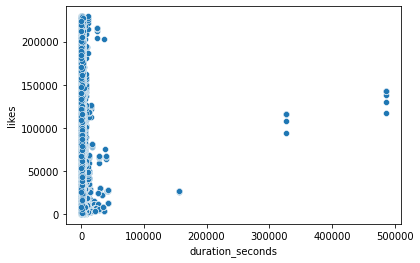

In [69]:
sns.scatterplot(data=df_likes,x='duration_seconds',y='likes')

In [70]:
test.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.0,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True


In [71]:
df_likes['description_len'] = df_likes['description'].apply(lambda x: len(x.split()))

<ipython-input-71-eaea55684197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_likes['description_len'] = df_likes['description'].apply(lambda x: len(x.split()))


<AxesSubplot:xlabel='description_len', ylabel='likes'>

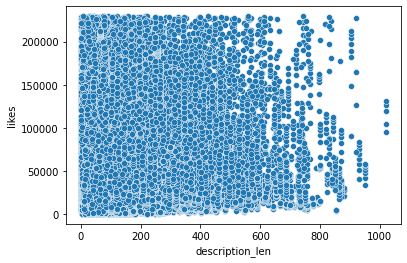

In [72]:
sns.scatterplot(data=df_likes,x='description_len',y='likes')

In [74]:
df_views = train.copy()

In [79]:
df_views.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'id', 'duration_seconds',
       'has_thumbnail', 'target', 'publishedYear', 'publishedMonth',
       'publishedDay'],
      dtype='object')

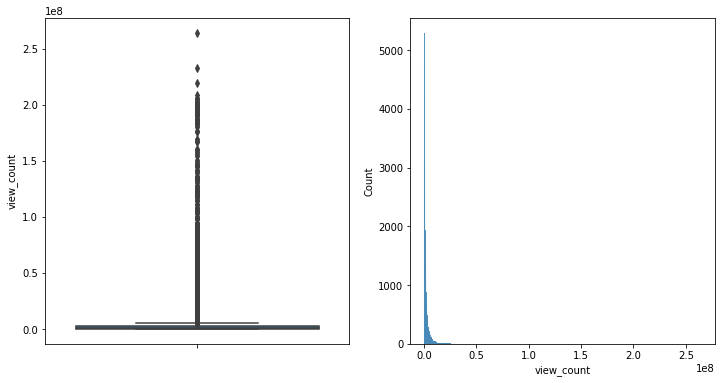

In [112]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.boxplot(data=df_views, y = 'view_count',ax=ax1)
sns.histplot(data=df_views,x='view_count',ax=ax2)
plt.show()

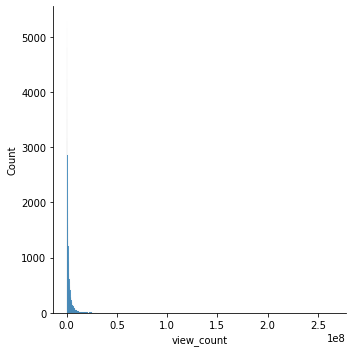

In [108]:
sns.displot(data=df_views,x='view_count')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54589 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53080 missing from c

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from c

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12481 missing from current f

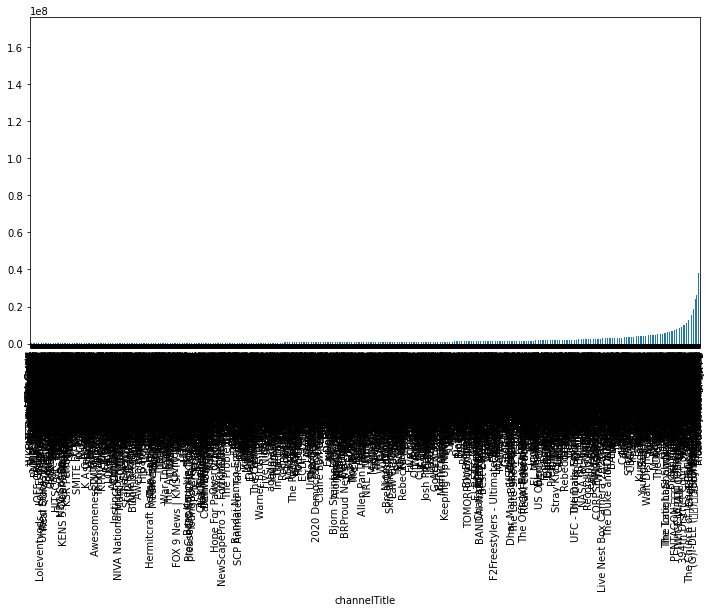

In [89]:
plt.figure(figsize=(12,6))
df_views.groupby('channelTitle')['view_count'].mean().sort_values().plot.bar()
plt.show()

In [99]:
q1 =df_views['view_count'].quantile(.25)
q3 =df_views['view_count'].quantile(.75)

IQR = (q3 -q1) *1.5

min_views = q1-IQR
max_views = q3 + IQR

In [100]:
min_views,max_views

(-2388966.5, 5402061.5)

In [113]:
df_views = df_views[(df_views['view_count'] > min_views) & (df_views['view_count'] < max_views)]

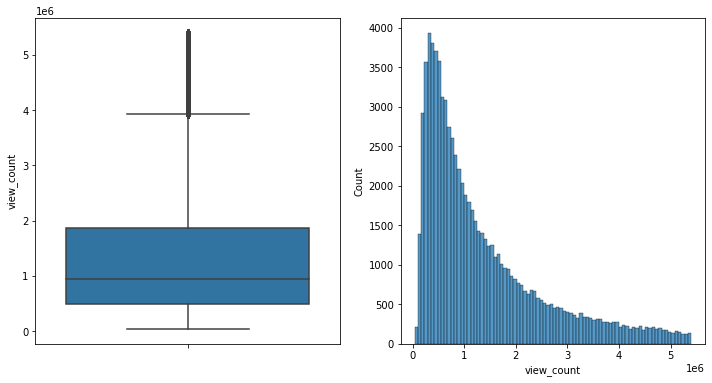

In [114]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.boxplot(data=df_views, y = 'view_count',ax=ax1)
sns.histplot(data=df_views,x='view_count',ax=ax2)
plt.show()

In [116]:
df_views['description_len'] = df_views['description'].apply(lambda x: len(x.split()))

<ipython-input-116-2b36b8ef10bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_views['description_len'] = df_views['description'].apply(lambda x: len(x.split()))


<AxesSubplot:xlabel='description_len', ylabel='view_count'>

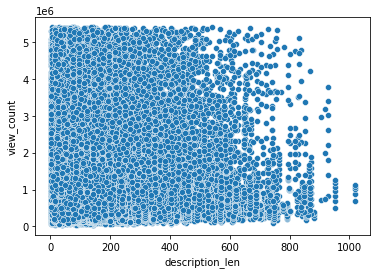

In [117]:
sns.scatterplot(data=df_views,x='description_len',y='view_count')

In [119]:
pd.concat([df_likes,df_views]).reset_index()

,index,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,...,description,id,duration_seconds,has_thumbnail,target,publishedYear,publishedMonth,publishedDay,tags_amt,description_len
0,40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,...,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235,2020,8,11,42.0,239
1,41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,430836,...,We answered your assumptions about us...Go to ...,OQZ5ht79nEw_2020-08-12,1083.0,True,0.087630,2020,8,11,17.0,70
2,42,zHPVGSwLhcg,Unboxing Apple's $129 Luxury Cable,2020-08-11 14:42:43+00:00,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,28,2020-08-12,unbox therapy|unboxtherapy|tech|technology|gad...,997102,...,ShhhhFOLLOW ME IN THESE PLACES FOR UPDATES\rTw...,zHPVGSwLhcg_2020-08-12,438.0,False,0.061170,2020,8,11,15.0,16
3,43,gi3VMMiFHVg,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12 02:30:32+00:00,UC9-OpMMVoNP5o10_Iyq7Ndw,Bleacher Report,17,2020-08-12,bleacher report|br|nba|giannis|giannis antetok...,756814,...,"In a random and wild sequence of events, Giann...",gi3VMMiFHVg_2020-08-12,164.0,False,0.010938,2020,8,12,19.0,40
4,44,p6RatnMhDj8,I TOOK A PREGNANCY TEST...,2020-08-11 02:40:01+00:00,UCpGCAsPlArOj9ptyCszxOOg,ValeYas Vlogs,22,2020-08-12,valeyas|vlogs|daily vlogs|beautyybird|pregnanc...,143091,...,▷SUBSCRIBE FOR DAILY VLOGS: http://bit.ly/2lFI...,p6RatnMhDj8_2020-08-12,1572.0,False,0.050031,2020,8,11,12.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155695,92267,ngG2XKJ_y1Q,Olivia Rodrigo - traitor (Live From The Americ...,2021-11-23 04:00:17+00:00,UCxE5jEls-T0QtlTHT8lI1lw,OliviaRodrigoVEVO,10,2021-11-30,Olivia Rodrigo|traitor|SOUR|AMAs|American Musi...,2924486,...,Olivia Rodrigo performs “traitor” at the 49th ...,ngG2XKJ_y1Q_2021-11-30,220.0,True,0.076746,2021,11,23,NaN,326
155696,92268,EbXvnAmdmm8,STUCK WITH MY SISTERS IN MY NYC APARTMENT FOR ...,2021-11-24 14:00:04+00:00,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,2021-11-30,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,615401,...,Booking travel is cheaper on Hopper. Download ...,EbXvnAmdmm8_2021-11-30,1251.0,True,0.069550,2021,11,24,NaN,67
155697,92270,H1tQhK0n5Qk,thanks for 5 million,2021-11-23 19:13:46+00:00,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23,2021-11-30,danny gonzalez|funny|commentary|comedy|react|r...,536056,...,#shorts,H1tQhK0n5Qk_2021-11-30,59.0,True,0.203994,2021,11,23,NaN,1
155698,92272,qfDVsuwg0TU,MY NEW KITCHEN REVEAL!!!!! EXCITING,2021-11-23 22:50:19+00:00,UCnB4LOZe6Dc5JUH9EoaHhKQ,Bri & Fern,1,2021-11-30,10-19-21,194119,...,Contracter email: Los3topetes@gmail.comFOLLOW ...,qfDVsuwg0TU_2021-11-30,824.0,True,0.075052,2021,11,23,NaN,11


# FE

In [120]:
#df = train.copy()
df = pd.concat([df_likes,df_views]).reset_index()

In [121]:
#df.info()

In [122]:
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [123]:
df['trending_date_month'] = df['trending_date'].dt.month

In [124]:
df['trending_date_year'] = df['trending_date'].dt.year

In [125]:
df['description_len'] = df['description'].apply(lambda x: len(x.split()))

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155700 entries, 0 to 155699
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   index                155700 non-null  int64              
 1   video_id             155700 non-null  object             
 2   title                155700 non-null  object             
 3   publishedAt          155700 non-null  datetime64[ns, UTC]
 4   channelId            155700 non-null  object             
 5   channelTitle         155700 non-null  object             
 6   categoryId           155700 non-null  int64              
 7   trending_date        155700 non-null  datetime64[ns]     
 8   tags                 155700 non-null  object             
 9   view_count           155700 non-null  int64              
 10  likes                155700 non-null  int64              
 11  dislikes             155700 non-null  int64              
 12  co

In [127]:
df['tag_amt'] = df['tags'].apply(lambda x: len(x.split('|')))

In [128]:
taglist = df['tags'].tolist()

In [129]:
taglist2 = []
for tag in taglist:
    tag = tag.split('|')
    for t in tag:
        taglist2.append(t)

In [130]:
from collections import Counter

In [131]:
counted_words = Counter(taglist2)

In [132]:
new_tags = sorted(counted_words.items(), key = lambda x: x[1],reverse = True)

In [133]:
top100_tags= new_tags[0:101]

In [134]:
top100_tags = [x[0] for x in top100_tags]


In [ ]:
# testdf = df[['tags']]
# testdf

In [ ]:
# for index, row in df.iterrows():
#     tagss = row['tags'].split('|')
#     for t in tagss:
#         if t in top100_tags:
#             testdf[t] = 1
#             pass
#     else:
#         testdf[t] = 0


## how to make the below faster?

In [135]:
for index, row in df.iterrows():
    tagss = row['tags'].split('|')
    for t in tagss:
        if t in top100_tags:
            df[t] = 1
            continue
    else:
        df[t] = 0

In [136]:
drop_cols =['video_id','channelTitle','id','publishedAt','trending_date','description','thumbnail_link','tags']
df= df.drop(drop_cols,1)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155700 entries, 0 to 155699
Columns: 10146 entries, index to christmas evel skz
dtypes: bool(3), float64(3), int64(10138), object(2)
memory usage: 11.8+ GB


In [140]:
df = df.drop(['title','channelId'],1)

In [139]:
df.columns

Index(['index', 'title', 'channelId', 'categoryId', 'view_count', 'likes',
       'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled',
       ...
       'worst teacher', 'arcaneshow', 'water', '화사 컴백',
       'troll anyone speedrun', 'weeknd die for you', 'Sony Music México',
       'violinist', 'I Pushed DanTDM Off A Bridge...', 'christmas evel skz'],
      dtype='object', length=10146)

In [ ]:
[x for x in df.columns if df[x].dtype == 'O']

In [142]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [141]:
encoder = LabelEncoder()
chan_ID = encoder.fit_transform(df['channelId'])

NameError: name 'LabelEncoder' is not defined

# Model Training

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [144]:
X = df.drop(['likes','view_count'],1)
ylikes = df['likes']
yviewa = df['view_count']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, ylikes, test_size=0.33, random_state=26)

In [146]:
scaler = MinMaxScaler()

In [1]:
x_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_train)

NameError: name 'scaler' is not defined

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_tra)